In [1]:
from PCA import CustomPCA
from sklearn.decomposition import PCA
import altair as alt
import pandas as pd
from plotter import plotter
from benchmark import forest_bench, forest_pca_bench
from helpers import printm

TRAIN_SIZE = 50000
LIMIT_COMPONENTS = 60

## Prepare datasets for training and testing

In [2]:
# Divide MNIST dataset into pixels and and labels
mnist = pd.read_csv("data/mnist.csv")
mnist_data, mnist_labels = mnist.drop(["label"], axis=1).values, mnist["label"]

In [3]:
# Divide Rocketbook dataset into pixels and and labels
rocketbook = pd.read_csv("data/handwritten.csv")
rocketbook_data, rocketbook_labels = rocketbook.drop(["label"], axis=1).values, rocketbook["label"]

In [4]:
mnist_train = {
    'data':  mnist_data[:TRAIN_SIZE],
    'label': mnist_labels[:TRAIN_SIZE]
}

mnist_test = {
    'data':  mnist_data[TRAIN_SIZE:],
    'label': mnist_labels[TRAIN_SIZE:]
}

rocketbook_test = {
    'data':  rocketbook_data,
    'label': rocketbook_labels
}

In [5]:
print(f"Training dataset size:   {len(mnist_train['data'])}\n" +\
      f"Testing dataset size:    {len(mnist_test['data'])}\n" +\
      f"Rocketbook dataset size: {len(rocketbook_test['data'])}")

Training dataset size:   50000
Testing dataset size:    10000
Rocketbook dataset size: 128


## <ins>MNIST</ins> train dataset

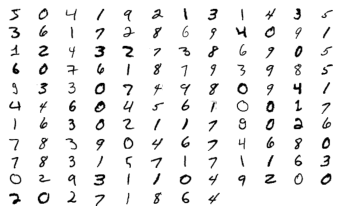

In [6]:
printm(mnist_train['data'][:128])

## <ins>MNIST</ins> test dataset

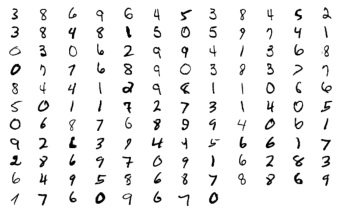

In [7]:
printm(mnist_test['data'][:128])

## <ins>Rocketbook</ins> handwritten dataset

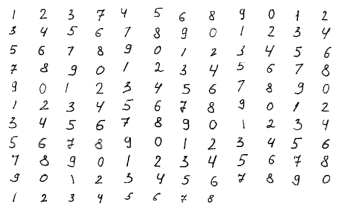

In [8]:
printm(rocketbook_test['data'])

In [9]:
test_cases = [{"classifier": CustomPCA, 
               "label": "from scratch"}, 
              {"classifier": PCA, 
               "label": "scikit-learn"}]

## Testing RandomForest classifier on <ins>MNIST</ins> dataset

In [10]:
print(forest_bench(mnist_train, mnist_test))

Training time:            |  38.56068301200867
Testing time:             |  0.41852593421936035
Mean Absolute Error:      |  0.1049
Mean Squared Error:       |  0.5313
Root Mean Squared Error:  |  0.7289032857656769
Accuracy:                 |  0.9727


## Test PCAs' implementations on <ins>MNIST</ins> dataset

In [11]:
data = [forest_pca_bench(test["classifier"], test["label"], pca_num, mnist_train, mnist_test)
            for pca_num in range(1, LIMIT_COMPONENTS+1)
                for test in test_cases]

## PCAs' <ins>transformation</ins> time

In [12]:
alt.renderers.enable('default'); plotter(data, "pca_time", ("Number of Components", "Time in seconds", "PCAs"))

alt.LayerChart(...)

## Classifier's <ins>testing</ins> time

In [13]:
alt.renderers.enable('default'); plotter(data, "testing_time", ("Number of Components", "Time in seconds", "PCAs"))

alt.LayerChart(...)

## Classifier's <ins>training</ins> time

In [14]:
alt.renderers.enable('default'); plotter(data, "training_time", ("Number of Components", "Time in seconds", "PCAs"))

alt.LayerChart(...)

## Classifier's <ins>accuracy</ins>

In [15]:
alt.renderers.enable('default'); plotter(data, "accuracy", ("N of Components", "Accuracy", "PCAs"))

alt.LayerChart(...)

## Classifiers' <ins>Absolute Error</ins>

In [16]:
alt.renderers.enable('default'); plotter(data, "abs_err", ("Number of Components", "Absolute Error", "PCAs"))

alt.LayerChart(...)

## Classifier's <ins>Mean Squred Error</ins>

In [17]:
alt.renderers.enable('default'); plotter(data, "mse_err", ("Number of Components", "Mean Squred Error", "PCAs"))

alt.LayerChart(...)

## Classifier's <ins>Root Mean Squred Error</ins>

In [18]:
alt.renderers.enable('default'); plotter(data, "rmse_err", ("Number of Components", "Root Mean Squred Error", "PCAs"))

alt.LayerChart(...)

## Training on <ins>MNIST</ins> testing on <ins>Rocketbook</ins> handwritten digits

In [19]:
print(forest_bench(mnist_train, rocketbook_test))

Training time:            |  32.82165503501892
Testing time:             |  0.018013477325439453
Mean Absolute Error:      |  2.2265625
Mean Squared Error:       |  10.7109375
Root Mean Squared Error:  |  3.2727568653965116
Accuracy:                 |  0.3828125


## Training on <ins>Rocketbook</ins> handwritten digits testing on <ins>MNIST</ins> train set

In [20]:
print(forest_bench(rocketbook_test, mnist_train))

Training time:            |  0.1628720760345459
Testing time:             |  0.7558178901672363
Mean Absolute Error:      |  2.8164
Mean Squared Error:       |  15.12904
Root Mean Squared Error:  |  3.8896066639186024
Accuracy:                 |  0.31798


## Training on <ins>Rocketbook</ins> handwritten digits testing on <ins>MNIST</ins> test set

In [21]:
print(forest_bench(rocketbook_test, mnist_test))

Training time:            |  0.15134429931640625
Testing time:             |  0.1439685821533203
Mean Absolute Error:      |  2.7796
Mean Squared Error:       |  14.304
Root Mean Squared Error:  |  3.7820629291433003
Accuracy:                 |  0.2979
